<a href="https://colab.research.google.com/github/willismax/MediaSystem-Python-Course/blob/main/01.Intro-Python/10%E5%88%86%E9%90%98Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10分鐘的Pandas入門-繁中版

來自Pandas官方文件
- 原文詳見: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html
- 正體中文: https://hackmd.io/@wiimax/10-minutes-to-pandas


- 此份介紹源自官方文件，是對Pandas的簡短介紹，~~其實一點也不短~~。您可以在官方[Cookbook](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#cookbook)中看到更多的內容。

- 需要使用的模組

In [2]:
import numpy as np
import pandas as pd

- 後續繪圖會使用的模組


In [3]:
import matplotlib.pyplot as plt

## pandas 的基本資料結構

Pandas 提供了兩種類型的類別來處理資料：

1.  [`Series`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series "貓熊系列")：保存任何類型資料的一維數值組合。例如整數、字串、Python 物件等。
2.  [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame "pandas.DataFrame")：一種二維資料結構，用於保存數據，例如二維數組或具有行和列的表格。


## Object creation 創建物件

- 參閱官方文件[Data Structure Intro section](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dsintro)
- 通過傳入一個list創建[Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series)，pandas預設會產生整數的[RangeIndex](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.RangeIndex.html#pandas.RangeIndex)。


In [3]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

- [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame "pandas.DataFrame")透過使用帶有標籤的list傳遞帶有日期時間索引的 NumPy 數組來建立[`date_range()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html#pandas.date_range "pandas.date_range")：

In [7]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.358721,-0.575534,2.003537,-1.476565
2013-01-02,-0.163403,0.285457,1.222907,0.593862
2013-01-03,-0.943713,-0.344567,-0.627236,1.000452
2013-01-04,-1.731149,0.353483,1.390743,-1.202633
2013-01-05,-0.681118,1.415959,0.218710,-0.636616
2013-01-06,0.144320,-1.115527,-0.656379,0.567106


- [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame "pandas.DataFrame")以字典`dict`:`{Key:Value}`創建`DataFrame`，其中Key是列標籤、Value是列之值。

In [4]:
df2 = pd.DataFrame(
    {'A': 1.,
    'B': pd.Timestamp('20130102'),
    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
    'D': np.array([3] * 4, dtype='int32'),
    'E': pd.Categorical(["test", "train", "test", "train"]),
    'F': 'foo'}
    )
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


[`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame "pandas.DataFrame")欄位可以有不同的資料結構 [dtypes](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-dtypes)：

In [ ]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

- 如果用IPython、Jupyter notebook等筆記本形式使用`Tab`可自動展示補全所有的屬性、自定義欄位。


In [ ]:
#df2.<tab>

![image](https://hackmd.io/_uploads/BkrzLCV10.png)

## Viewing data 檢視資料

參閱[Basics section](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics)  

以`.head(n)`查前n筆資料、以`tail(n)`查看末n筆資料。

In [ ]:
df.head()

,A,B,C,D
2013-01-01,-0.275297,-0.615197,0.098480,-1.569252
2013-01-02,-0.629435,1.172478,2.025126,-1.364893
2013-01-03,1.961387,0.387696,-2.114131,-1.421082
2013-01-04,0.166945,1.264534,1.234071,-2.123566
2013-01-05,-0.542935,0.183387,-0.426700,0.443767


In [ ]:
df.tail(3)

,A,B,C,D,E,F
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


以`.index`, `.columns`顯示索引及欄位名稱。


In [ ]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

`DataFrame.to_numpy()`轉換為`NumPy`。
> 但請注意如果該`DataFrame`具有不同資料型態(int、str...)，這可能是一項昂貴的操作，主因是NumPy數組對整個數組有一個dtype，而pandas DataFrames每列有一個dtype。當呼叫時 DataFrame.to_numpy()，pandas會找到可以容納 DataFrame中所有 dtypes 的NumPy dtype。這可能最終成為object，這需要將每個值都轉換為Python物件。

In [9]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

- 以下df的DataFrame值皆為浮點數，` DataFrame.to_numpy()`就相當快。


In [11]:
df.to_numpy()

array([[-2.30987828, -1.12955827,  1.35434755,  0.11582124],
       [ 0.88502567,  0.675703  , -0.59685986, -0.17591021],
       [ 0.72510479,  0.86666626, -0.07001442,  1.52964535],
       [ 0.4940606 ,  1.53249036, -0.45491729, -0.56907326],
       [ 0.55405095,  0.14642738,  0.82586401,  0.12471647],
       [ 1.26255598, -0.82389326,  1.84656687, -0.39380253]])

- 以下df2的`DataFrame`有不同`dtypes`，運算代價高


In [12]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

>Note DataFrame.to_numpy() does not include the index or column labels in the output.

以`describe()`快速檢視數據統計摘要

In [ ]:
df.describe()

,0,1,2,3
count,10.000000,10.000000,10.000000,10.000000
mean,0.493184,-0.006870,-0.662426,-0.215356
std,0.937321,0.634647,1.125282,0.668763
min,-0.406372,-1.065897,-2.243619,-1.130796
25%,-0.296070,-0.365314,-1.247031,-0.612986
50%,0.210086,-0.101766,-0.829783,-0.465157
75%,1.268923,0.407116,0.158077,0.168614
max,1.945387,0.922616,0.927221,1.135062


以`T`轉置資料矩陣(列、欄互換)


In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9
0,1.945387,-0.219103,1.513958,-0.406372,-0.384594,1.850298,0.533818,-0.321725,0.183219,0.236954
1,0.520786,-1.065897,-0.337300,-0.248149,0.066106,0.044617,0.922616,-0.374652,0.895682,-0.492512
2,-2.243619,-0.359255,0.330522,0.927221,-1.298315,-1.002366,-1.093181,-2.127500,-0.657199,0.899433
3,0.417304,0.067595,-0.780844,-1.130796,0.202287,1.135062,-0.469699,-0.460614,-0.474805,-0.659047


依軸排序`sort_index(axis=1, ascending=False)`，結果為以ROW、遞增排序。


In [16]:
df

,A,B,C,D
2013-01-01,-2.309878,-1.129558,1.354348,0.115821
2013-01-02,0.885026,0.675703,-0.596860,-0.175910
2013-01-03,0.725105,0.866666,-0.070014,1.529645
2013-01-04,0.494061,1.532490,-0.454917,-0.569073
2013-01-05,0.554051,0.146427,0.825864,0.124716
2013-01-06,1.262556,-0.823893,1.846567,-0.393803


In [17]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.115821,1.354348,-1.129558,-2.309878
2013-01-02,-0.175910,-0.596860,0.675703,0.885026
2013-01-03,1.529645,-0.070014,0.866666,0.725105
2013-01-04,-0.569073,-0.454917,1.532490,0.494061
2013-01-05,0.124716,0.825864,0.146427,0.554051
2013-01-06,-0.393803,1.846567,-0.823893,1.262556


[`DataFrame.sort_values()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values "pandas.DataFrame.sort_values")按值排序：


In [20]:
df.sort_values(by='B')

,A,B,C,D
2013-01-01,-2.309878,-1.129558,1.354348,0.115821
2013-01-06,1.262556,-0.823893,1.846567,-0.393803
2013-01-05,0.554051,0.146427,0.825864,0.124716
2013-01-02,0.885026,0.675703,-0.596860,-0.175910
2013-01-03,0.725105,0.866666,-0.070014,1.529645
2013-01-04,0.494061,1.532490,-0.454917,-0.569073


## Selection 選取

>注意，雖然標準的`Python`、`numpy`表達式直觀可用，但建議以`Pandas`優化的選擇方法，如[`DataFrame.at()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at "pandas.DataFrame.at")、[`DataFrame.iat()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iat.html#pandas.DataFrame.iat "pandas.DataFrame.iat")和 。[`DataFrame.loc()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc "pandas.DataFrame.loc") [`DataFrame.iloc()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc "pandas.DataFrame.iloc")
。

參閱文件[Indexing and Selecting Data](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing) and [MultiIndex / Advanced Indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced).

### Getting 取得資料


[`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame "pandas.DataFrame")
選取單一欄位，將會回傳一個`Series`, `df['A']`相當於`df.A`:

In [9]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.704870,0.566818,0.797446,2.810047
2013-01-02,-0.147189,-1.314244,-0.364999,-0.871612
2013-01-03,1.253460,0.902591,1.021884,0.049802
2013-01-04,-0.785255,-0.241989,1.015692,0.772570
2013-01-05,0.556265,-0.584245,0.767000,-0.302947
2013-01-06,-0.444504,0.271635,0.047434,-0.979701


In [22]:
df['A']

2013-01-01   -1.125461
2013-01-02   -0.010937
2013-01-03   -1.261088
2013-01-04   -2.009015
2013-01-05    2.532907
2013-01-06   -0.817114
Freq: D, Name: A, dtype: float64

- 以中括號`[]`選擇想要的rows進行切片


In [23]:
df[0:3]

,A,B,C,D
2013-01-01,-1.125461,-0.779583,-0.710507,-1.848439
2013-01-02,-0.010937,0.618909,-0.904582,0.288781
2013-01-03,-1.261088,1.881600,-0.358854,0.479547


In [24]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.010937,0.618909,-0.904582,0.288781
2013-01-03,-1.261088,1.881600,-0.358854,0.479547
2013-01-04,-2.009015,-0.853181,0.771693,-0.956761


### 以標籤進行選擇


請參閱 [按標籤選擇](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-label) 了解更多內容。  
[`DataFrame.loc()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc "pandas.DataFrame.loc") [`DataFrame.at()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at "pandas.DataFrame.at")

- 選擇與標籤相符的行：


In [25]:
df.loc[dates[0]]

A   -1.125461
B   -0.779583
C   -0.710507
D   -1.848439
Name: 2013-01-01 00:00:00, dtype: float64

以標籤選擇多欄位數據


In [26]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,-1.125461,-0.779583
2013-01-02,-0.010937,0.618909
2013-01-03,-1.261088,1.881600
2013-01-04,-2.009015,-0.853181
2013-01-05,2.532907,-0.426603
2013-01-06,-0.817114,-0.037713


以標籤取得多欄位數據

In [27]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,-0.010937,0.618909
2013-01-03,-1.261088,1.881600
2013-01-04,-2.009015,-0.853181


以標籤組合縮減顯示維度:

In [28]:
df.loc['20130102', ['A', 'B']]

A   -0.010937
B    0.618909
Name: 2013-01-02 00:00:00, dtype: float64

獲取單筆數值:


In [29]:
df.loc[dates[0], 'A']

-1.1254611297673898

快速存取標量（相當於先前的方法）：

In [30]:
df.at[dates[0], 'A']

-1.1254611297673898

### Selection by position 以位置選擇


> `loc`以標籤取得Rows數據，`iloc`以行號取得數據。


在[Selection by Position](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-integer) 查看更多內容。 [`DataFrame.iloc()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc "pandas.DataFrame.iloc") [`DataFrame.iat()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iat.html#pandas.DataFrame.iat "pandas.DataFrame.iat")

以整數數值選擇:

In [ ]:
df.iloc[3]

A    0.061076
B   -1.472339
C    1.019217
D    2.295793
Name: 2013-01-04 00:00:00, dtype: float64

以整數切片，使用方式類似`numpy`、`python`風格:


In [ ]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.061076,-1.472339
2013-01-05,0.247691,-0.391888


以list指定位置，使用方式類似`numpy`、`python`風格:

In [ ]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,1.401896,1.595538
2013-01-03,-1.170969,-0.369580
2013-01-05,0.247691,0.720181


對行rows切片:


In [31]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.010937,0.618909,-0.904582,0.288781
2013-01-03,-1.261088,1.881600,-0.358854,0.479547


對欄columns切片:


In [32]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.779583,-0.710507
2013-01-02,0.618909,-0.904582
2013-01-03,1.881600,-0.358854
2013-01-04,-0.853181,0.771693
2013-01-05,-0.426603,0.855989
2013-01-06,-0.037713,0.631903


取得特定值:


In [ ]:
df.iloc[1, 1]

-0.8594052379894221

快速取得特定值（相當於先前的方法）:

In [ ]:
df.iat[1, 1]

-0.8594052379894221

### Boolean indexing 布林索引


以單欄的值選取數據


In [33]:
df[df.A > 0]

,A,B,C,D
2013-01-05,2.532907,-0.426603,0.855989,-0.380934


顯示DataFrame滿足布林條件的情形


In [34]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,0.618909,NaN,0.288781
2013-01-03,NaN,1.881600,NaN,0.479547
2013-01-04,NaN,NaN,0.771693,NaN
2013-01-05,2.532907,NaN,0.855989,NaN
2013-01-06,NaN,NaN,0.631903,0.475741


以`isin()`方法篩選數據:


In [35]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,-1.125461,-0.779583,-0.710507,-1.848439,one
2013-01-02,-0.010937,0.618909,-0.904582,0.288781,one
2013-01-03,-1.261088,1.881600,-0.358854,0.479547,two
2013-01-04,-2.009015,-0.853181,0.771693,-0.956761,three
2013-01-05,2.532907,-0.426603,0.855989,-0.380934,four
2013-01-06,-0.817114,-0.037713,0.631903,0.475741,three


In [36]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-1.261088,1.881600,-0.358854,0.479547,two
2013-01-05,2.532907,-0.426603,0.855989,-0.380934,four


### Setting 設置


設定新列會自動按索引對齊資料：


In [39]:
s1 = pd.Series(
    [1, 2, 3, 4, 5, 6],
    index=pd.date_range('20130102', periods=6))

In [40]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [41]:
df['F'] = s1

以標籤更新數值:


In [42]:
df.at[dates[0], 'A'] = 0

以位置更新數值:

In [43]:
df.iat[0, 1] = 0

以NumPy array更新


In [44]:
df.loc[:, 'D'] = np.array([5] * len(df))

<ipython-input-44-38ea1d699f7d>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'D'] = np.array([5] * len(df))


前述操作更新結果


In [45]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.710507,5,NaN
2013-01-02,-0.010937,0.618909,-0.904582,5,1.0
2013-01-03,-1.261088,1.881600,-0.358854,5,2.0
2013-01-04,-2.009015,-0.853181,0.771693,5,3.0
2013-01-05,2.532907,-0.426603,0.855989,5,4.0
2013-01-06,-0.817114,-0.037713,0.631903,5,5.0


- 以`where`條件判斷運算子更新值


In [46]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.710507,-5,NaN
2013-01-02,-0.010937,-0.618909,-0.904582,-5,-1.0
2013-01-03,-1.261088,-1.881600,-0.358854,-5,-2.0
2013-01-04,-2.009015,-0.853181,-0.771693,-5,-3.0
2013-01-05,-2.532907,-0.426603,-0.855989,-5,-4.0
2013-01-06,-0.817114,-0.037713,-0.631903,-5,-5.0


## Missing data 缺失值處裡


- `pandas`以`np.nan`表示缺失值，預設情況不進行運算，參閱 [Missing Data section](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data)

- `.reindex()`可以修改/增加/刪除索引，將回傳一個數據的副本

In [47]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.710507,5,NaN,1.0
2013-01-02,-0.010937,0.618909,-0.904582,5,1.0,1.0
2013-01-03,-1.261088,1.881600,-0.358854,5,2.0,NaN
2013-01-04,-2.009015,-0.853181,0.771693,5,3.0,NaN


- 丟掉有區失值的行


In [48]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.010937,0.618909,-0.904582,5,1.0,1.0


- 對缺失值賦值

In [49]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.710507,5,5.0,1.0
2013-01-02,-0.010937,0.618909,-0.904582,5,1.0,1.0
2013-01-03,-1.261088,1.881600,-0.358854,5,2.0,5.0
2013-01-04,-2.009015,-0.853181,0.771693,5,3.0,5.0


- 以`.isna()`使用布林遮罩


In [50]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations 操作


 參閱[Basic section on Binary Ops](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics-binop)。

### Stats 統計

- 操作通常不包含缺失項(缺失要先預處理)

- 執行敘述統計-按列

In [51]:
df.mean()

A   -0.260875
B    0.197169
C    0.047607
D    5.000000
F    3.000000
dtype: float64

- 執行敘述統計-按欄


In [52]:
df.mean(1)

2013-01-01    1.072373
2013-01-02    1.140678
2013-01-03    1.452331
2013-01-04    1.181899
2013-01-05    2.392459
2013-01-06    1.955415
Freq: D, dtype: float64

- 如要Series或DataFrame操作不同維度需先對齊，Pandas會自動沿著指定維度廣播(broadcasting)，並且會用`np.nan`填滿未對齊的標籤。


In [54]:
#以時間為index對齊
#.shift(2)為資料沿軸順移2位
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [ ]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-2.170969,0.165388,-1.369580,4.0,1.0
2013-01-04,-2.938924,-4.472339,-1.980783,2.0,0.0
2013-01-05,-4.752309,-5.391888,-4.279819,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### 使用者定義的函數
應用`DataFrame.agg()`、`DataFrame.transform()`使用者定義的函數來分別減少或廣播其結果。

In [10]:
df.agg(lambda x: np.mean(x) * 5.6)

A   -0.253954
B   -0.372805
C    3.065493
D    1.379616
dtype: float64

In [11]:
df.transform(lambda x: x * 101.2)

,A,B,C,D
2013-01-01,-71.332813,57.361985,80.701539,284.376787
2013-01-02,-14.895563,-133.001502,-36.937928,-88.207084
2013-01-03,126.850114,91.342192,103.414632,5.039981
2013-01-04,-79.467854,-24.489324,102.788060,78.184111
2013-01-05,56.294054,-59.125599,77.620423,-30.658251
2013-01-06,-44.983768,27.489506,4.800303,-99.145737


### 價值很重要
- 更多資訊請參見[直方圖和離散化](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-discretization)。

In [13]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    4
1    5
2    5
3    6
4    0
5    4
6    4
7    6
8    4
9    3
dtype: int64

In [14]:
s.value_counts()

4    4
5    2
6    2
0    1
3    1
dtype: int64

### 字串方法

[Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series)具有字串`str`的處理方法 ，可以方便地對數組的每個元素進行操作，如下面的程式碼片段所示。請參閱[向量化字串方法](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#text-string-methods)以了解更多資訊。  
請注意，str中的模式匹配通常默認使用[正則表達式](https://docs.python.org/3/library/re.html)（在某些情況下總是使用它們）


In [17]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Apply 應用


- 以Applying functions進行資料處理:


In [57]:
df.apply(np.cumsum) #累加

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.710507,5,NaN
2013-01-02,-0.010937,0.618909,-1.615089,10,1.0
2013-01-03,-1.272026,2.500509,-1.973943,15,3.0
2013-01-04,-3.281041,1.647328,-1.202250,20,6.0
2013-01-05,-0.748134,1.220725,-0.346261,25,10.0
2013-01-06,-1.565248,1.183012,0.285642,30,15.0


In [56]:
df.apply(lambda x: x.max() - x.min())

A    4.541923
B    2.734781
C    1.760571
D    0.000000
F    4.000000
dtype: float64

### Histogramming 直方圖


- 至[Histogramming and Discretization](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics-discretization)了解更多.

In [ ]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    6
1    3
2    4
3    3
4    5
5    5
6    3
7    6
8    5
9    1
dtype: int64

In [ ]:
s.value_counts()

3    3
5    3
6    2
4    1
1    1
dtype: int64

## Merge合併

### Concat連接


- pandas提供各種簡易的合併Series及Dataframe物件操作方式，參閱[Merging section](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging)

- 以`concat()`連接pandas物件:


In [ ]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.506593,-0.281081,0.746550,1.735186
1,0.989668,0.185910,-1.778557,0.581550
2,0.721338,2.238897,-0.962611,0.539238
3,0.834441,-0.933721,-0.189241,0.671273
4,0.450458,0.528146,0.543115,0.932024
5,1.513235,-0.702748,0.704447,-0.450666
6,0.681953,0.028782,-0.113496,-0.766260
7,-1.170186,1.762876,-0.727707,1.141059
8,-0.798267,1.301011,1.038994,0.186938
9,-0.420932,-0.383501,0.358864,1.501124


In [ ]:
 #break it into pieces
pieces = [df[:3], df[3:7], df[7:]] #分段
pd.concat(pieces)

,0,1,2,3
0,0.506593,-0.281081,0.746550,1.735186
1,0.989668,0.185910,-1.778557,0.581550
2,0.721338,2.238897,-0.962611,0.539238
3,0.834441,-0.933721,-0.189241,0.671273
4,0.450458,0.528146,0.543115,0.932024
5,1.513235,-0.702748,0.704447,-0.450666
6,0.681953,0.028782,-0.113496,-0.766260
7,-1.170186,1.762876,-0.727707,1.141059
8,-0.798267,1.301011,1.038994,0.186938
9,-0.420932,-0.383501,0.358864,1.501124


> 向[DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame)新增"Column"相對較快。但是，添加"Row"需要copy副本，並且可能很昂貴。我們建議將預先建立的記錄列表傳遞給DataFrame建構函數，而不是DataFrame透過迭代地向其追加記錄來建構

### Join


[merge()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html#pandas.merge) 可以採用SQL style合併。參閱[Database style joining](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging-join)章節。

In [18]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [19]:
 left

,key,lval
0,foo,1
1,foo,2


In [20]:
right

,key,rval
0,foo,4
1,foo,5


In [21]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


[merge()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html#pandas.merge)唯一值:

In [22]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [23]:
left

,key,lval
0,foo,1
1,bar,2


In [24]:
right

,key,rval
0,foo,4
1,bar,5


In [25]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping 分組


- 透過“group by”將數據對每個分組應用不同的function並結合展示成果，過程為:
    - 依據某種標準將數據拆分(Splitting)為組
    - 將設計好的功能(applying)對每個組獨立處理。
    - 結合(Combining)成果至資料結構
- 參閱[Grouping](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#groupby)章節.

In [26]:
df = pd.DataFrame(
    {
        'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
        'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
        'C': np.random.randn(8),
        'D': np.random.randn(8)
        }
    )
df

,A,B,C,D
0,foo,one,0.000883,0.636639
1,bar,one,0.654188,-0.310195
2,foo,two,0.024534,0.168135
3,bar,three,-0.679078,-0.902283
4,foo,two,-0.016720,-1.011777
5,bar,two,-0.594449,0.214609
6,foo,one,-0.696707,-1.028798
7,foo,three,0.624042,0.532560


按列標籤分組，選擇列標籤，然後將 [DataFrameGroupBy.sum()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.sum.html#pandas.core.groupby.DataFrameGroupBy.sum)函數套用至結果組：

In [27]:
df.groupby('A').sum()

<ipython-input-27-180a798bba5b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('A').sum()


,C,D
A,,
bar,-0.619339,-0.997869
foo,-0.063968,-0.703242


以多欄位分組形成分層索引，並應用`sum()`

In [28]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.654188 -0.310195
    three -0.679078 -0.902283
    two   -0.594449  0.214609
foo one   -0.695824 -0.392159
    three  0.624042  0.532560
    two    0.007814 -0.843643

## Reshaping 重塑


參閱[Hierarchical Indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced-hierarchical) and [Reshaping](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-stacking)章節內容

### Stack 堆疊


In [29]:
arrays = [
   ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
   ["one", "two", "one", "two", "one", "two", "one", "two"],
]

In [31]:
#pandas.MultiIndex.from_tuples將包含多個list的元組轉換為複雜索引
index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2),index=index, columns=['A', 'B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.140847  1.091070
      two     0.112114  0.132283
baz   one     0.769262  0.724900
      two     2.665358  1.396644

- 使用[stack()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack)方法將DataFrame壓縮(compresses)為階層形式的欄位


In [32]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.140847
               B    1.091070
       two     A    0.112114
               B    0.132283
baz    one     A    0.769262
               B    0.724900
       two     A    2.665358
               B    1.396644
dtype: float64

使用堆疊的DataFrame或Series（具有階層索引[MultiIndex](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.MultiIndex.html#pandas.MultiIndex)），與`stack()`相反的操作為`unstack()`，預設情況下為取消堆疊最後一級：

In [33]:
stacked.unstack()

A         B
first second                    
bar   one    -0.140847  1.091070
      two     0.112114  0.132283
baz   one     0.769262  0.724900
      two     2.665358  1.396644

In [34]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.140847  0.112114
      B  1.091070  0.132283
baz   A  0.769262  2.665358
      B  0.724900  1.396644

In [35]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.140847  0.769262
       B  1.091070  0.724900
two    A  0.112114  2.665358
       B  0.132283  1.396644

### Pivot tables


- 參閱[Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-pivot)

In [36]:
df = pd.DataFrame(
    {
        'A': ['one', 'one', 'two', 'three'] * 3,
        'B': ['A', 'B', 'C'] * 4,
        'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
        'D': np.random.randn(12),
        'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.833166,1.752005
1,one,B,foo,-1.728551,0.557783
2,two,C,foo,-0.367939,-0.774656
3,three,A,bar,0.276421,0.680210
4,one,B,bar,-0.754887,-1.126590
5,one,C,bar,-0.569578,-0.039145
6,two,A,foo,-1.026571,0.361757
7,three,B,foo,-0.042320,0.151448
8,one,C,foo,-1.826835,-0.869474
9,one,A,bar,0.944373,-0.457136


- 我們可以非常輕鬆地從這些數據生成數據透視表：


In [ ]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  2.498511  1.824232
      B -1.003934 -0.067862
      C -2.524319 -0.252663
three A -0.195924       NaN
      B       NaN  0.476729
      C -0.523206       NaN
two   A       NaN -1.333094
      B -0.274002       NaN
      C       NaN  1.926482

## Time series 時間序列


- pandas具有簡單，強大且高效的功能，用於在頻率轉換期間執行重採樣操作（例如，將第二數據轉換為5分鐘數據）。這在財務應用程序中非常常見，但不僅限於此。請參閱[Time Series](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries)章節


In [37]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    28681
Freq: 5T, dtype: int64

- 時區呈現：


In [48]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.229559
2012-03-07    0.162211
2012-03-08   -0.406204
2012-03-09   -1.573471
2012-03-10   -0.176571
Freq: D, dtype: float64

In [49]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    0.229559
2012-03-07 00:00:00+00:00    0.162211
2012-03-08 00:00:00+00:00   -0.406204
2012-03-09 00:00:00+00:00   -1.573471
2012-03-10 00:00:00+00:00   -0.176571
Freq: D, dtype: float64

- [Series.tz_convert()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.tz_convert.html#pandas.Series.tz_convert)將轉換為另一個時區：


In [50]:
ts_utc.tz_convert('Asia/Taipei')

2012-03-06 08:00:00+08:00    0.229559
2012-03-07 08:00:00+08:00    0.162211
2012-03-08 08:00:00+08:00   -0.406204
2012-03-09 08:00:00+08:00   -1.573471
2012-03-10 08:00:00+08:00   -0.176571
Freq: D, dtype: float64

[BusinessDay](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.tseries.offsets.BusinessDay.html#pandas.tseries.offsets.BusinessDay)在不同時間跨度表示間轉換：

In [54]:
rng

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M')

In [55]:
rng + pd.offsets.BusinessDay(5)

DatetimeIndex(['2012-02-07', '2012-03-07', '2012-04-06', '2012-05-07',
               '2012-06-07'],
              dtype='datetime64[ns]', freq=None)

- 在期間和時間戳之間進行轉換可以使用一些方便的算術函數。以下範例為，將季度頻率轉換為個季最後一個月的上午9點：


## Categoricals 分類


- 現在pandas可以在DataFrame中包含分類數據，詳情參閱[categorical introduction](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html#categorical) 及[API documentation](https://pandas.pydata.org/pandas-docs/stable/reference/arrays.html#api-arrays-categorical).

In [56]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6],"raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})

- 將原始成績轉換為分類數據


In [57]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

- 重命名分類使其更有意義(使用` Series.cat.categories`轉換).


In [58]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

<ipython-input-58-41a87e5c4cf7>:1: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  df["grade"].cat.categories = ["very good", "good", "very bad"]


- 重新整理類別，並添加缺少的類別(預設為回傳新 Series).


In [59]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

- 按整理後的類別排序`.sort_values()`


In [60]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


- 按類別分類也會包含具空值的類別


In [ ]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting 繪圖


請參閱[Plotting](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization)文檔。


In [61]:
import matplotlib.pyplot as plt
plt.close("all")

此plt.close方法用於關閉圖形視窗：

<Axes: >

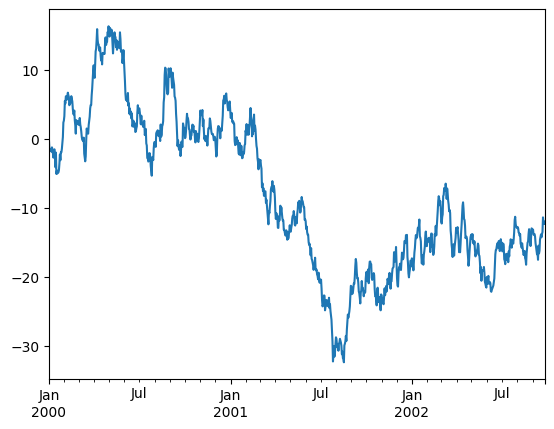

In [64]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

> 使用 Jupyter 時，繪圖將使用出現plot()。否則使用 matplotlib.pyplot.show顯示它或 matplotlib.pyplot.savefig將其寫入檔案。

- 在DataFrame上，該`plot()`方法可以方便地使用標籤繪製所有列：


In [65]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

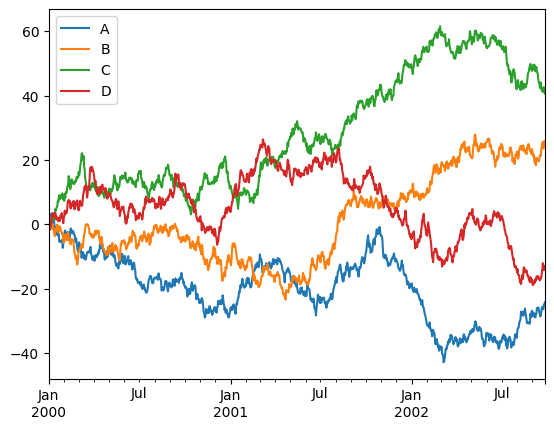

In [66]:
df.plot()
plt.legend(loc='best')

## Getting data in/out 資料讀取、輸出

### CSV



- [Writing to a csv file](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-store-in-csv)

In [67]:
df = pd.DataFrame(np.random.randint(0, 5, (10, 5)))
df.to_csv('foo.csv')

- [Reading from a csv file](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-read-csv-table)


In [68]:
pd.read_csv("foo.csv")

,Unnamed: 0,0,1,2,3,4
0,0,4,4,3,4,2
1,1,4,0,1,4,2
2,2,0,3,2,2,0
3,3,3,0,4,4,4
4,4,1,2,2,0,1
5,5,1,0,3,4,3
6,6,0,3,3,2,1
7,7,3,0,2,2,3
8,8,0,0,4,3,4
9,9,4,3,4,4,2


### Parquet


In [ ]:
df.to_parquet("foo.parquet")

In [ ]:
pd.read_parquet("foo.parquet")

### HDF5


### Excel


讀寫[MS Excel](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-excel)

- 寫入excel檔案[DataFrame.to_excel()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_excel.html#pandas.DataFrame.to_excel)


In [70]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

- - 讀取excel檔案[read_excel()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html#pandas.read_excel)


In [71]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,0,1,2,3,4
0,0,4,4,3,4,2
1,1,4,0,1,4,2
2,2,0,3,2,2,0
3,3,3,0,4,4,4
4,4,1,2,2,0,1
5,5,1,0,3,4,3
6,6,0,3,3,2,1
7,7,3,0,2,2,3
8,8,0,0,4,3,4
9,9,4,3,4,4,2


## Gotchas 小陷阱


- 如果操作時遇到異常，如:

    ```python
    >>> if pd.Series([False, True, False]):
    ...     print("I was true")
    Traceback
        ...
    ValueError: The truth value of an array is ambiguous. Use a.empty, a.any() or a.all().
    ```

- 請查看[Comparisons](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics-compare)來處理異常，或查看[Gotchas](https://pandas.pydata.org/pandas-docs/stable/user_guide/gotchas.html#gotchas)也可以.